In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Pharma_data_analysis.xlsx')
df.head(5)

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Åšwiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,CzeladÅº,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

In [4]:
df.describe()

,Latitude,Longitude,Quantity,Price,Sales,Year
count,254082.000000,254082.000000,254082.000000,254082.000000,2.540820e+05,254082.000000
mean,50.962222,10.803212,112.872139,412.207720,4.643772e+04,2018.385187
std,1.625526,4.143311,744.310385,224.963687,3.491918e+05,1.041352
min,47.514200,6.083800,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,49.805600,7.891100,5.000000,195.000000,1.704000e+03,2018.000000
50%,51.133300,9.397800,20.000000,430.000000,5.850000e+03,2018.000000
75%,52.083300,12.133300,50.000000,605.000000,2.156525e+04,2019.000000
max,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,2020.000000


Data Labelling (Date: # 1 as a january, 2 as a february, etc)

In [5]:
# Solusi 2: Gunakan pd.to_datetime tanpa format (auto-detect)
df['Date'] = pd.to_datetime(df['Month'].astype(str) + ' ' + df['Year'].astype(str))
df = df.sort_values('Date')
df = df.drop(columns=['Year', 'Month'])

df.head(10)

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Name of Sales Rep,Manager,Sales Team,Date
43630,Erdman,Waelchi LLC Pharm,Sinsheim,Germany,49.2500,8.8833,Pharmacy,Retail,Belavarix Benzabicin,Antibiotics,50.0,131,6550.0,Anne Wu,Britanny Bold,Delta,2017-01-01
43172,Gerlach LLC,Kozey Ltd Pharma Plc,Griesheim,Germany,49.8594,8.5525,Pharmacy,Institution,Amphesirox,Antiseptics,10.0,25,250.0,Daniel Gates,Alisha Cordwell,Charlie,2017-01-01
43173,Gerlach LLC,"Blanda, Stehr and Gleason Pharma Plc",Starnberg,Germany,47.9972,11.3406,Hospital,Private,Tetalamide,Antibiotics,10.0,430,4300.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43174,Gerlach LLC,Hane Ltd,NÃ¼rtingen,Germany,48.6267,9.3353,Hospital,Government,Decidenu Galantrigine,Antipiretics,10.0,590,5900.0,Daniel Gates,Alisha Cordwell,Charlie,2017-01-01
43175,Gerlach LLC,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,49.5103,11.2772,Hospital,Private,Cricane Acamsumab,Antiseptics,30.0,22,660.0,Jessica Smith,Britanny Bold,Delta,2017-01-01
43176,Gerlach LLC,Legros-Runte Pharmaceutical Limited,Neckarsulm,Germany,49.1917,9.2244,Hospital,Private,Doxivorin,Antimalarial,7.0,516,3612.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43177,Gerlach LLC,"Wiegand, Jast and Yost Pharmaceutical Ltd",Ludwigshafen,Germany,49.4811,8.4353,Pharmacy,Institution,Antilamin Clinbital,Antibiotics,20.0,664,13280.0,Morris Garcia,Tracy Banks,Bravo,2017-01-01
43178,Gerlach LLC,Welch-Langworth Pharm,Papenburg,Germany,53.0667,7.4000,Hospital,Private,Sumanazole,Analgesics,32.0,529,16928.0,Abigail Thompson,Tracy Banks,Bravo,2017-01-01
43179,Gerlach LLC,"Sanford, Franecki and Greenholt Pharmaceutical...",Rheine,Germany,52.2833,7.4333,Pharmacy,Institution,Raparidol,Mood Stabilizers,40.0,187,7480.0,Sheila Stones,Britanny Bold,Delta,2017-01-01
43180,Gerlach LLC,Kihn Group Pharm,Vaihingen an der Enz,Germany,48.9328,8.9564,Hospital,Private,Pazofenac,Mood Stabilizers,24.0,123,2952.0,Thompson Crawford,James Goodwill,Alfa,2017-01-01


Data Preprocessing

In [6]:
pd.DataFrame(df[['Product Name', 'Product Class']].value_counts().tail(20))

,,0
Product Name,Product Class,
Acycpex,Mood Stabilizers,1017
Afluferon Entrarenone,Antimalarial,1017
Cordamectin Actolamin,Antipiretics,1016
Ergomethate,Mood Stabilizers,1015
Travosoline Capolac,Antipiretics,1014
Ranediol,Antibiotics,1014
Algluconium Dorzofoxin,Antibiotics,1013
Pulmogen Alitora,Antiseptics,1012
Aggretisol,Antimalarial,1011


In [7]:
# We classified from product class
pd.DataFrame(df['Product Class'].value_counts())

,Product Class
Antiseptics,52037
Mood Stabilizers,46415
Analgesics,44751
Antibiotics,36979
Antipiretics,36955
Antimalarial,36945


In [8]:
# Get numeric columns excluding Date and index
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Date' if exists
if 'Date' in numeric_columns:
    numeric_columns.remove('Date')

# Display numeric data only
df[numeric_columns].head()

,Latitude,Longitude,Quantity,Price,Sales
43630,49.2500,8.8833,50.0,131,6550.0
43172,49.8594,8.5525,10.0,25,250.0
43173,47.9972,11.3406,10.0,430,4300.0
43174,48.6267,9.3353,10.0,590,5900.0
43175,49.5103,11.2772,30.0,22,660.0


Data Visualisations

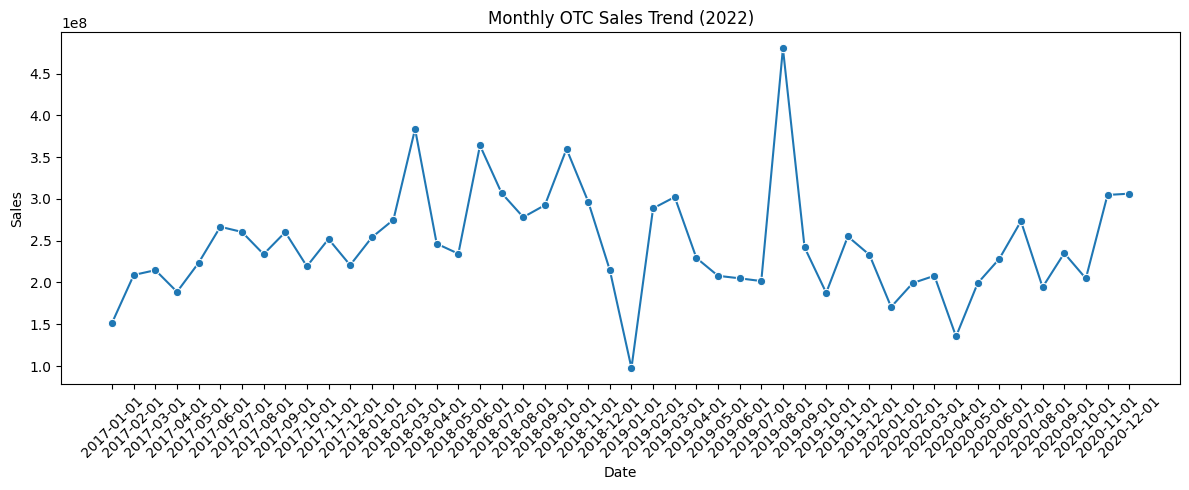

In [9]:
monthly_sales = df.groupby('Date')['Sales'].sum().reset_index()
monthly_sales.columns = ['Date', 'Sales']  # Ubah nama kolom
monthly_sales['Date'] = monthly_sales['Date'].astype(str) # For plotting

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly OTC Sales Trend (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

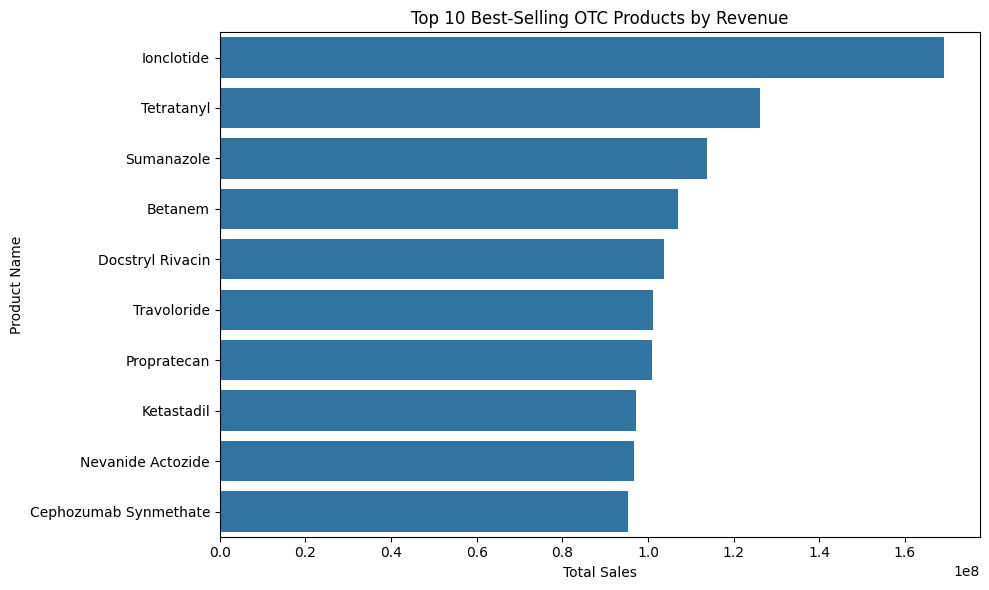

In [10]:
# Top 10 Products by Revenue
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling OTC Products by Revenue')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

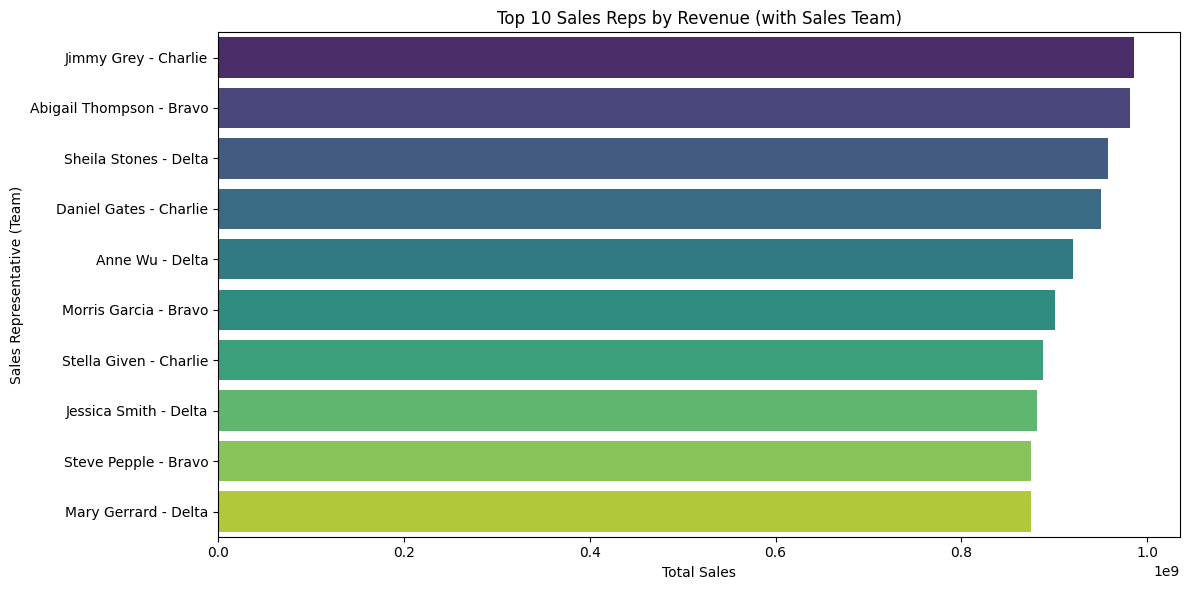

In [11]:
# Sales by Name of sales rep and sales team
sales_rep = df.groupby(['Name of Sales Rep', 'Sales Team'])['Sales'].sum().reset_index()

# sort by sales rep revenue
sales_rep = sales_rep.sort_values('Sales', ascending=False).head(10)

# Create combines label ( Sales rep - Sales Team)
sales_rep['Label'] = sales_rep['Name of Sales Rep'] + ' - ' + sales_rep['Sales Team']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_rep, x='Sales', y='Label', palette='viridis')
plt.title('Top 10 Sales Reps by Revenue (with Sales Team)')
plt.xlabel('Total Sales')
plt.ylabel('Sales Representative (Team)')
plt.tight_layout()
plt.show()

Top 10 Cities Statistics:
                Total_Sales  Avg_Sales  Transactions  Total_Qty  Avg_Qty
City                                                                    
Butzbach        93561780.00  247517.94           378  174234.00   460.94
Baesweiler      64890501.00  163041.46           398  132080.00   331.86
Cuxhaven        56006680.00  145095.03           386  124868.00   323.49
Friedberg       52183634.60   65557.33           796  124236.40   156.08
Altenburg       50885320.00  128823.59           395   94970.00   240.43
Emsdetten       45939009.00  119322.10           385   89970.00   233.69
Bottrop         44454616.00  122802.81           362  103978.00   287.23
Freising        43779381.00  112833.46           388  100146.00   258.11
Trier           43495626.00  121496.16           358   90563.00   252.97
Castrop-Rauxel  42066659.97  100158.71           420   91253.73   217.27


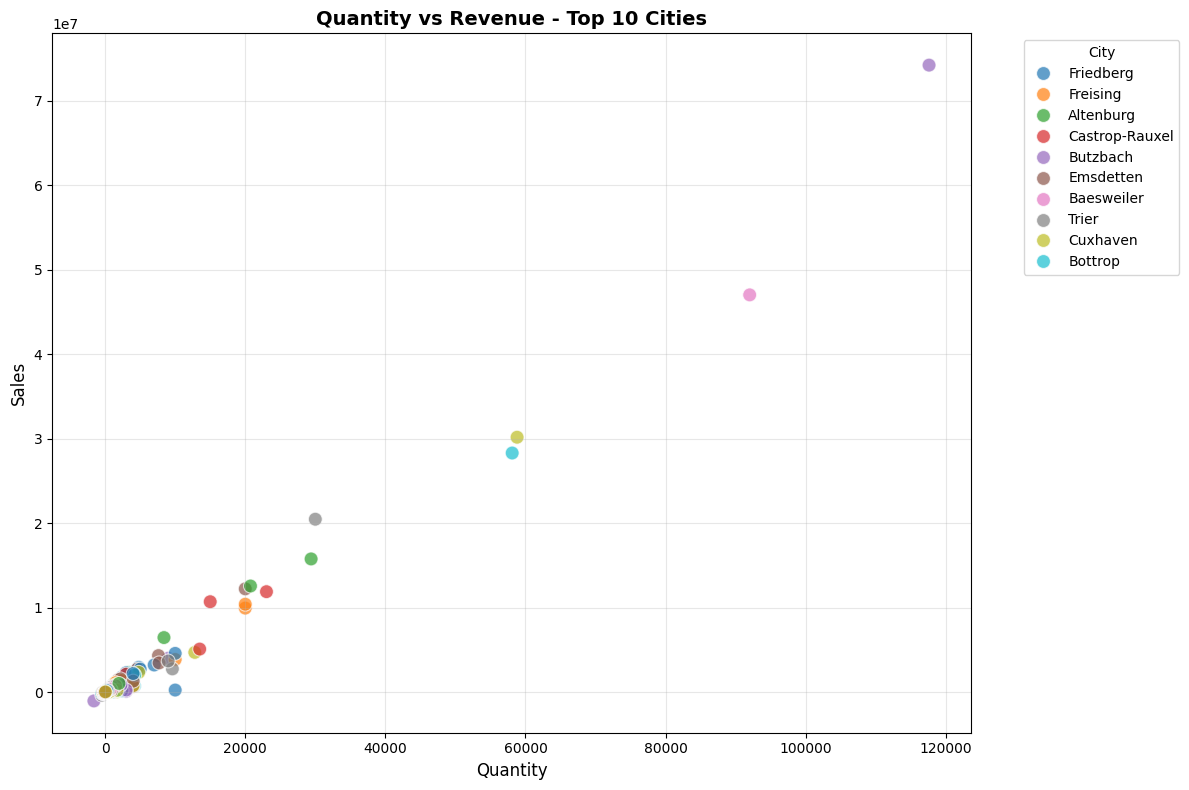

In [12]:
# Ambil 10 city dengan total sales tertinggi
top_10_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_10_cities = top_10_cities_sales.index

# Filter dataframe
df_top_cities = df[df['City'].isin(top_10_cities)]

city_stats = df_top_cities.groupby('City').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean']
}).round(2)

city_stats.columns = ['Total_Sales', 'Avg_Sales', 'Transactions', 'Total_Qty', 'Avg_Qty']
city_stats = city_stats.sort_values('Total_Sales', ascending=False)

# print informations
print("Top 10 Cities Statistics:")
print(city_stats)

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_cities, x='Quantity', y='Sales', hue='City', 
                s=100, alpha=0.7, palette='tab10')
plt.title('Quantity vs Revenue - Top 10 Cities', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='City', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
df['Sales'].describe()

count    2.540820e+05
mean     4.643772e+04
std      3.491918e+05
min     -4.161600e+06
25%      1.704000e+03
50%      5.850000e+03
75%      2.156525e+04
max      7.420560e+07
Name: Sales, dtype: float64

Split data into X and y

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

df = df.dropna() # remove missinvg values

# Change data target to category
bins = [0, 1500, 6000, np.inf]  # Misalnya, batas untuk kategori
labels = ['Low', 'Medium', 'High']
df['Sales_Category'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Encode sales_category into numerical values
label_encoder = LabelEncoder()

# Update X dan y
X = df[numeric_columns].drop(columns=['Sales', 'Latitude', 'Longitude'], errors='ignore')
y = label_encoder.fit_transform(df['Sales_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Engineering and Data Modelling

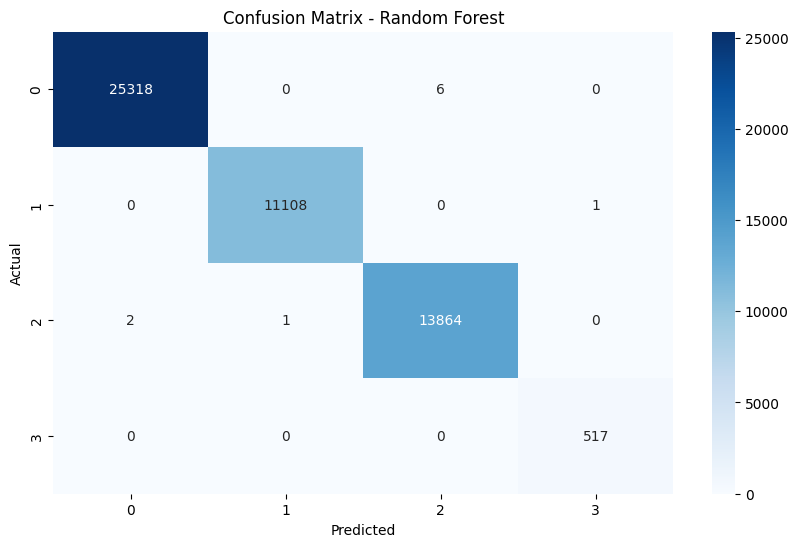

In [15]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Data Modelling
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    
    # Fit model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Cross-Validated Accuracy': mean_accuracy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Create confusion matrix for the best model
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
y_pred_best = models[best_model_name].predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# results dataframe
results_df

,Model,Cross-Validated Accuracy,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.822774,0.823110,0.825664,0.823110,0.824219
1,Random Forest,0.999850,0.999803,0.999803,0.999803,0.999803
2,XGBoost,0.998953,0.999331,0.999332,0.999331,0.999331


Reporting prediction

In [17]:
df['Date'].describe()

count                  254082
unique                     48
top       2018-10-01 00:00:00
freq                     9964
first     2017-01-01 00:00:00
last      2020-12-01 00:00:00
Name: Date, dtype: object

In [18]:
# ...existing code...
future_days = 10

# Filter numeric_columns untuk hanya menyertakan kolom yang relevan
# Misalnya, jika model Anda dilatih dengan 'Feature1' dan 'Feature2'
relevant_columns = X.columns.tolist()  # Ganti dengan nama kolom yang sesuai
last_10_days = df[relevant_columns].iloc[-10:].copy()  # Ambil hanya kolom yang diperlukan

# Debugging: Cek bentuk last_10_days
print("Shape of last_10_days before prediction:", last_10_days.shape)

# create list of future predictions
future_predictions = []

for day in range(future_days):
    # use last 10 days data to predict next day
    predicted_sales = model.predict(last_10_days)  # Pastikan bentuknya 2D
    future_predictions.append(predicted_sales[0])

    # update sequence for next prediction
    last_10_days = last_10_days.shift(-1)  # Geser data untuk prediksi berikutnya
    last_10_days.iloc[-1] = predicted_sales[0]  # Update nilai terakhir dengan prediksi

# create future dates
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=future_days, freq='D')

Shape of last_10_days before prediction: (10, 2)


In [19]:
future_dates

DatetimeIndex(['2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11'],
              dtype='datetime64[ns]', freq='D')

Create a forecasting

In [20]:
# forecasting prediction model
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
predictions = models[best_model_name].predict(X_test)

In [21]:
# Forecasting results

values = np.asarray(predictions).ravel()

# Create a pandas DataFrame
df_date = pd.DataFrame({'Date': future_dates, 'Value': values[-10:]}) # take last 10 predictions
df_date = df_date.set_index('Date') # Set the 'Date' column as the index (important for time series)

# get actual sales values which align with future_dates
sales_series = (
    df.groupby('Date', as_index=True)['Sales'].sum().sort_index()
)

# reindex to align with future dates
actual_sales_for_future = sales_series.reindex(df_date.index)

# create fallback: median sales per class (Low, Medium, High)
tmp = df.copy()
tmp['Sales_Category'] = label_encoder.transform(tmp['Sales_Category'])
median_sales_per_class = tmp.groupby('Sales_Category')['Sales'].median().to_dict()

pred_proxy_sales = pd.Series(
    [median_sales_per_class.get(int(cls), np.nan) for cls in df_date['Value'].values],
    index=df_date.index
)

# anonotation values: use actual sales if available, otherwise use proxy
annot_values = actual_sales_for_future.combine_first(pred_proxy_sales)

sales_predictions = pd.DataFrame({
    'Date': df_date.index,
    'Predicted_Sales': annot_values.values
}).dropna()

# aggregate monthly predictions
monthly_predictions = (
    sales_predictions.set_index('Date').resample('D')['Predicted_Sales'].sum().reset_index()
)
monthly_predictions['Date'] = monthly_predictions['Date'].dt.strftime('%Y-%m-%d')  # Format Date for plotting

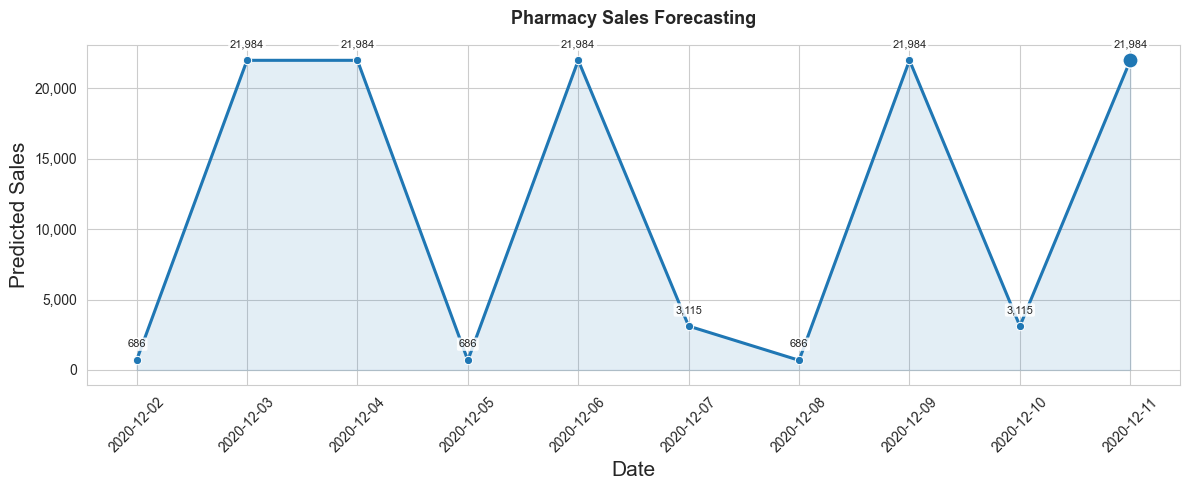

In [22]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import AutoDateLocator, DateFormatter

mp = monthly_predictions.copy()
mp['Date'] = pd.to_datetime(mp['Date'], errors='coerce')
mp = mp.dropna(subset=['Date', 'Predicted_Sales'])

sns.set_style('whitegrid')
c = sns.color_palette('tab10')[0]

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=mp, x='Date', y='Predicted_Sales', marker='o', color=c, linewidth=2.2, ax=ax)

# bottom curve
ax.fill_between(mp['Date'], mp['Predicted_Sales'], color=c, alpha=0.12)

# add annotation values each point
for x, y in zip(mp['Date'], mp['Predicted_Sales']):
    ax.annotate(
        f"{y:,.0f}",
        xy=(x, y),
        xytext=(0, 8),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.15', fc='white', alpha=0.85, ec='none')
    )

ax.scatter(mp['Date'].iloc[-1], mp['Predicted_Sales'].iloc[-1], color=c, s=120, zorder=5, edgecolor='white')

# axis format
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{int(v):,}"))
ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Pharmacy Sales Forecasting', fontsize=13, fontweight='semibold', pad=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Predicted Sales', fontsize=15)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()